In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
STATS = 'WL_23_WPH_short_CMBWL'
# STATS = 'WPH'
# STATS = 'WL_3_WPH_short'


In [3]:
DD = np.load('/global/cfs/cdirs/des/mgatti/CMB_lensing/DV/SBI_forecast/compression/compression_data_combined.npy',allow_pickle=True).item()
stat = DD['stat']
mask = DD['mask']
target = DD['data']

# wph get rid of stuff that's degenerate with wl2 and wl3
# this defines "WPH_short"
mask_l = np.array(16*[ True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True, False, False, False, False,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False])
mask_nbody_wph = np.hstack([np.array([False]*60),np.array([False]*120),mask_l])

# these keys are DVs that don't exist. 
# These indices are defined to select from their corresponding odict ('original dictionary') DVs that do exist
indict2 = dict()
indict2['WL_23_WPH_short'] = np.concatenate( ( list( range(320) ), np.array( range(320, 1076))[mask_nbody_wph]) )
indict2['WL_3_WPH_short'] = np.concatenate( ( list( range(160, 320) ), np.array( range(320, 1076))[mask_nbody_wph]) )
indict2['WL_23_WPH_short_CMBWL'] = np.concatenate( ( list( range(320) ), np.array( range(320, 1076))[mask_nbody_wph], list(range(1076, 1108) )) )
indict2['WPH'] = np.array( range(160, 916))[mask_nbody_wph]
indict2['CMBWL'] = range(160, 192)

odict = dict()
odict['WL_3_WPH_short'] = 'WL_23_WPH'
odict['WL_23_WPH_short'] = 'WL_23_WPH'
odict['WL_23_WPH_short_CMBWL'] = 'WL_23_WPH_WCMBL'
odict['WPH'] = 'WL_2_WPH'
odict['CMBWL'] = 'WL_2_WCMBL'

for key in odict.keys():
    print(key)
    stat[key] = stat[odict[key]].copy()
    stat[key]['dv'] = stat[key]['dv'][:,indict2[key]]
        

swapind = np.array([0,1,2,3,4,13,14,15,9,10,11,12,5,6,7,8,16])   # om s8 w a e .    ob ns h ...   dm dz
 
for key in stat.keys():
    stat[key]['params'] = stat[key]['params'][:,swapind]

# defining additional_mask that filters away some extreme values of w, A, eta
parms = stat['WL_2']['params']
extra =   (parms[:,3]<0.8)  & (parms[:,3]>0.2) &\
         (parms[:,4]>0.1) &   (parms[:,4]<0.9) 

additional_mask = (stat['WL_2']['params'][:,2]>0.1)&extra



WL_3_WPH_short
WL_23_WPH_short
WL_23_WPH_short_CMBWL
WPH
CMBWL


In [4]:
print(DD['stat'].keys())

dict_keys(['CMB_2_array', 'CMB_3_array', 'CMB_WL_2_array', 'CMB_WL_3_array', 'CMB_WPH_S00_array', 'CMB_WPH_S11_array', 'CMB_WPH_S10_array', 'CMB_WL_WPH_S00_array', 'CMB_WL_WPH_S11_array', 'CMB_WL_WPH_S10_array', 'WL_CMB_WPH_S00_array', 'WL_CMB_WPH_S10_array', 'WL_2', 'WL_3', 'WL_CMB_3', 'WL_WPH_Gauss', 'WL_WPH_S00', 'WL_WPH_S01', 'WL_ST1', 'WL_ST2', 'WL_23', 'WL_ST', 'WL_WPH', 'WL_CMB_23', 'WL_CMB_WPH', 'WL_23_WPH', 'WL_2_WPH', 'WL_23_WPH_sp', 'WL_23_WPH_sp2', 'WL_23_WPH_WCMBL', 'WL_23_WPH_WCMBL_CMBL', 'WL_2_WCMBL', 'WL_2_WCMBL_CMBL', 'WL_3_WPH_short', 'WL_23_WPH_short', 'WL_23_WPH_short_CMBWL', 'WPH', 'CMBWL'])


In [5]:
# these are the pars/DV that will be used to train the compression (or whatever pre-processing).
pars_train = np.array(stat[STATS]['params'][mask&additional_mask,:16])
dv = np.array(stat[STATS]['dv'][mask&additional_mask,:])

    # these are the pars/DV that will be used for the LFI step later on 
    # (so you apply whatever compression/preprocessing to these and give to NDE)
pars_LFI = np.array(stat[STATS]['params'][(~mask)&additional_mask,:16])
dv_LFI = np.array(stat[STATS]['dv'][(~mask)&additional_mask,:])

In [6]:
pars_train.shape, dv.shape, pars_LFI.shape, dv_LFI.shape

((9124, 16), (9124, 608), (8187, 16), (8187, 608))

In [7]:
416+256

672

In [8]:
idx_wph_3rd = range(-32-256-160, -32)
dv_norm = copy.copy(dv)
dv_norm[:,idx_wph_3rd] = dv_norm[:,idx_wph_3rd]*1e3

In [9]:
dv_norm.shape

(9124, 608)

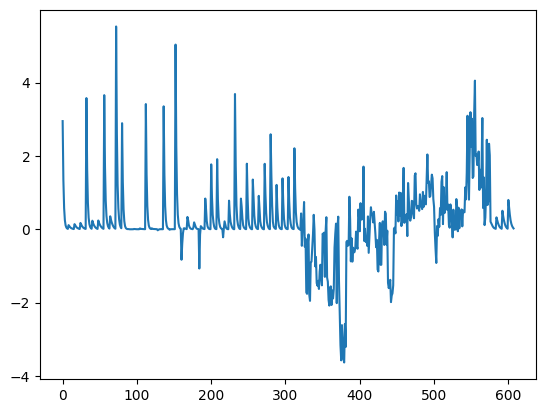

In [10]:
# plt.plot(dv[0]);
plt.plot(dv_norm[10]*1e5)
# plt.yscale('log')

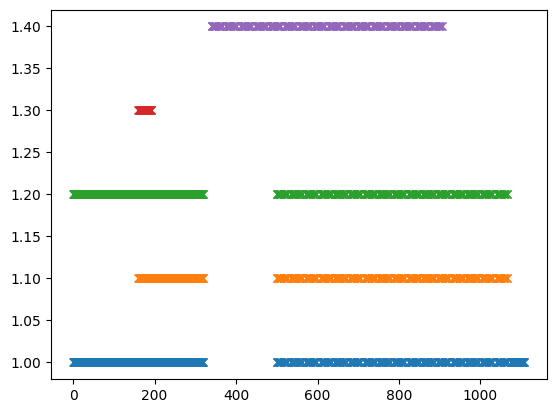

In [11]:
plt.plot(indict2['WL_23_WPH_short_CMBWL'], np.ones(indict2['WL_23_WPH_short_CMBWL'].shape[0]),'x', label='WL_23_WPH_short_CMBWL')

plt.plot(indict2['WL_3_WPH_short'], np.ones(indict2['WL_3_WPH_short'].shape[0])+.1,'x', label='WL_3_WPH_short')

plt.plot(indict2['WL_23_WPH_short'], np.ones(indict2['WL_23_WPH_short'].shape[0])+.2,'x', label='WL_23_WPH_short')

plt.plot(indict2['CMBWL'], np.ones(len(indict2['CMBWL']))+.3,'x', label='CMBWL')

plt.plot(indict2['WPH'], np.ones(len(indict2['WPH']))+.4,'x', label='WPH')

# plt.legend()

In [12]:
DD.keys()

dict_keys(['stat', 'mask', 'data'])

In [13]:
derivatives_dict = np.load('/global/cfs/cdirs/des/mgatti/CMB_lensing/DV/SBI_forecast/MOPED_derivatives.npy',allow_pickle=True).item()


In [14]:
derivatives_dict.keys()

dict_keys(['WL_2', 'WL_3', 'WL_23', 'WL_WPH_S01', 'WL_WPH_S00', 'WL_WPH_Gauss', 'WL_WPH', 'WL_2_WPH', 'WL_23_WPH', 'CMB_2_array', 'CMB_WL_2_array', 'CMB_WL_3_array', 'CMB_WL_WPH_S00_array', 'CMB_WL_WPH_S11_array', 'CMB_WL_WPH_S10_array', 'WL_CMB_WPH_S00_array', 'WL_CMB_WPH_S10_array', 'WL_CMB_3', 'WL_23_WPH_WCMBL', 'WL_23_WPH_WCMBL_CMBL', 'WL_2_WCMBL', 'WL_2_WCMBL_CMBL'])

(2304, 1108)


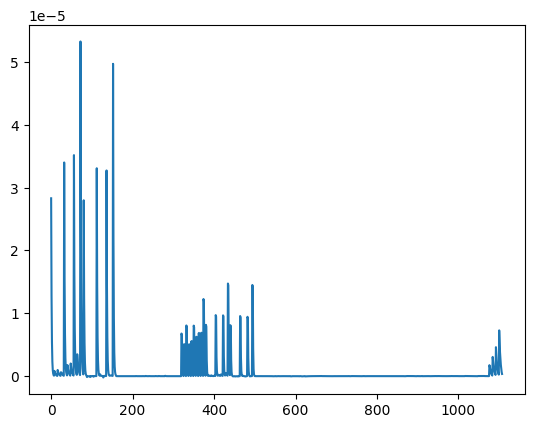

In [15]:
plt.plot(derivatives_dict['WL_23_WPH_WCMBL']['cov'][0])

print(derivatives_dict['WL_23_WPH_WCMBL']['delta_s8'][1].shape)


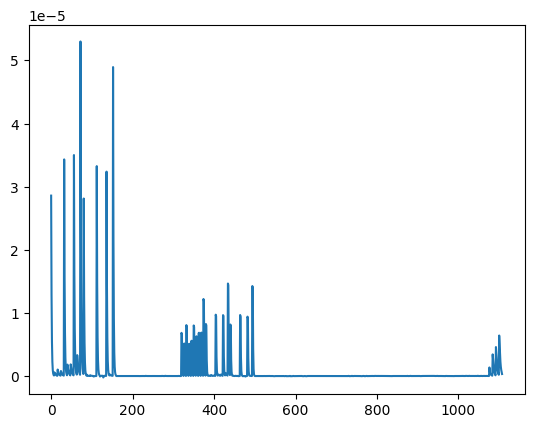

In [16]:
plt.plot(derivatives_dict['WL_23_WPH_WCMBL']['delta_s8'][1][0])